<a href="https://www.kaggle.com/code/suryan5h/accident-risk-index-swissre-hackathon?scriptVersionId=103779203" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [76]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-accident-risk-score-for-unique-postcode/sample_submission.csv
/kaggle/input/predict-accident-risk-score-for-unique-postcode/population.csv
/kaggle/input/predict-accident-risk-score-for-unique-postcode/train.csv
/kaggle/input/predict-accident-risk-score-for-unique-postcode/test.csv
/kaggle/input/predict-accident-risk-score-for-unique-postcode/roads_network.csv


In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [78]:
train = pd.read_csv('../input/predict-accident-risk-score-for-unique-postcode/train.csv')
test  = pd.read_csv('../input/predict-accident-risk-score-for-unique-postcode/test.csv')

In [79]:
print(train.shape)
print(test.shape)

(478741, 27)
(121259, 27)


#Train Data

In [80]:
#Finding null/missing values
train.isnull().sum()

Accident_ID                                      0
Police_Force                                     0
Number_of_Vehicles                               0
Number_of_Casualties                             0
Date                                             0
Day_of_Week                                      0
Time                                            14
Local_Authority_(District)                       0
Local_Authority_(Highway)                        0
1st_Road_Class                                   0
1st_Road_Number                                  0
Road_Type                                        0
Speed_limit                                      0
2nd_Road_Class                                   0
2nd_Road_Number                                  0
Pedestrian_Crossing-Human_Control                0
Pedestrian_Crossing-Physical_Facilities          0
Light_Conditions                                 0
Weather_Conditions                               0
Road_Surface_Conditions        

> There are 3 columns with missing values (Time, Road_Surface_Conditions, Special_Conditions_at_Site)

In [81]:
#Replacing null values in time with the mode of time because accidents might happen at that time mostly.
train.Time.fillna(train.Time.mode()[0],inplace=True)
train.Time.isnull().sum()

0

In [82]:
#Checking Road_Surface_Conditions
train.Road_Surface_Conditions.value_counts()
#Replacing with mode
train.Road_Surface_Conditions.fillna(train.Road_Surface_Conditions.mode()[0],inplace=True)
train.Road_Surface_Conditions.isnull().sum()

0

In [83]:
#Checking Special_Conditions_at_Site
train.Special_Conditions_at_Site.value_counts()
train.Special_Conditions_at_Site.fillna(train.Special_Conditions_at_Site.mode()[0],inplace=True)
train.Special_Conditions_at_Site.isnull().sum()

0

In [84]:
#Do the same thing for test data as well.
test.Time.fillna(test.Time.mode()[0],inplace=True)
test.Road_Surface_Conditions.fillna(test.Road_Surface_Conditions.mode()[0],inplace=True)
test.Special_Conditions_at_Site.fillna(test.Special_Conditions_at_Site.mode()[0],inplace=True)

In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478741 entries, 0 to 478740
Data columns (total 27 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   Accident_ID                                  478741 non-null  int64 
 1   Police_Force                                 478741 non-null  int64 
 2   Number_of_Vehicles                           478741 non-null  int64 
 3   Number_of_Casualties                         478741 non-null  int64 
 4   Date                                         478741 non-null  object
 5   Day_of_Week                                  478741 non-null  int64 
 6   Time                                         478741 non-null  object
 7   Local_Authority_(District)                   478741 non-null  int64 
 8   Local_Authority_(Highway)                    478741 non-null  object
 9   1st_Road_Class                               478741 non-null  int64 
 

In [86]:
#Converting to datetime
train["Date"] = train["Date"] + " " + train['Time']

In [87]:
train['Date'][:5]

0    19/12/12 13:20
1     02/11/12 7:53
2    02/11/12 16:00
3    06/05/12 16:50
4    30/06/12 13:25
Name: Date, dtype: object

In [88]:
train['Date'] = pd.to_datetime(train['Date'],format='%d/%m/%y %H:%M')

test["Date"] = test["Date"] + " " + test['Time']
test['Date'] = pd.to_datetime(test['Date'],format='%d/%m/%y %H:%M')

In [89]:
#train
train["day_in_month"]=train.Date.dt.day
train["month_in_year"]=train.Date.dt.month
train["year"]=train.Date.dt.year
train["hour"] = train["Date"].dt.hour
train['dayofweek'] = train['Date'].dt.dayofweek
train['Minute']=train['hour']*60.0+train["Date"].dt.minute
train['WeekofYear'] = train['Date'].apply(lambda x : x.weekofyear)

#test
test["day_in_month"]=test.Date.dt.day
test["month_in_year"]=test.Date.dt.month
test["year"]=test.Date.dt.year
test["hour"] = test["Date"].dt.hour
test['dayofweek'] = test['Date'].dt.dayofweek
test['Minute']=test['hour']*60.0+test["Date"].dt.minute
test['WeekofYear'] = test['Date'].apply(lambda x : x.weekofyear)


df1=test.copy()

train.head(3)

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country,day_in_month,month_in_year,year,hour,dayofweek,Minute,WeekofYear
0,1,34,2,1,2012-12-19 13:20:00,7,13:20,344,E10000032,4,395,Single carriageway,30,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,Ol or diesel,None,1,Yes,England,OX3 9UP,United Kingdom,19,12,2012,13,2,800.0,51
1,2,5,2,1,2012-11-02 07:53:00,4,7:53,102,E09000026,3,13,One way street,30,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Dry,None,None,1,No,England,S35 4EZ,United Kingdom,2,11,2012,7,4,473.0,44
2,3,1,2,1,2012-11-02 16:00:00,4,16:00,531,E10000016,6,8,Roundabout,40,6,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,BN21 2XR,United Kingdom,2,11,2012,16,4,960.0,44


In [90]:
train['Number_of_Casualties'].value_counts()

1    329124
2     98814
3     35399
4      9318
5      6086
Name: Number_of_Casualties, dtype: int64

In [91]:
#Before doing feature engineering, we will merge both the train and test dataset so that new features are there in both the sets.
#Also, we will need to identify between train or test data, so,...
train['train_or_test'] = 'train'
test['train_or_test'] = 'test'
df=pd.concat([train,test])

print("Combined Dataset shape: {}".format(df.shape))

Combined Dataset shape: (600000, 35)


In [92]:
df.head(3)

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country,day_in_month,month_in_year,year,hour,dayofweek,Minute,WeekofYear,train_or_test
0,1,34,2,1,2012-12-19 13:20:00,7,13:20,344,E10000032,4,395,Single carriageway,30,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,Ol or diesel,None,1,Yes,England,OX3 9UP,United Kingdom,19,12,2012,13,2,800.0,51,train
1,2,5,2,1,2012-11-02 07:53:00,4,7:53,102,E09000026,3,13,One way street,30,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Dry,None,None,1,No,England,S35 4EZ,United Kingdom,2,11,2012,7,4,473.0,44,train
2,3,1,2,1,2012-11-02 16:00:00,4,16:00,531,E10000016,6,8,Roundabout,40,6,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,BN21 2XR,United Kingdom,2,11,2012,16,4,960.0,44,train


In [93]:
#Checking categorical columns Postcode,Local_Authority_(Highway)
import category_encoders as ce
cat_features = ['postcode']
count_enc = ce.CountEncoder()
df['postcode_cnt'] = count_enc.fit_transform(df[cat_features])
#Local_Authority_(Highway)
cat_features_1 = ['Local_Authority_(Highway)']

# Create the encoder
count_enc = ce.CountEncoder()

# Transform the features, rename the columns with the _count suffix, and join to dataframe
df['LAH_cnt'] = count_enc.fit_transform(df[cat_features_1])

In [94]:
#creating function to identify time of day: morning, afternoon, evening, night, etc.
def time_of_day(n):
    if n in range(4,8):
        return 'Early Morning'
    elif n in range(8,12):
        return 'Morning'
    elif n in range(12,17):
        return 'Afternoon'
    elif n in range(17,20):
        return 'Evening'
    elif n in range(20,25) or n==0:
        return 'Night'
    elif n in range(1,4):
        return 'Late Night'
    
df['Type_of_Day']=df['hour'].apply(lambda x: time_of_day(x))

In [95]:
def month2seasons(x):
    if x in [9, 10, 11]:
        season = 'Spring'
    elif x in [12, 1, 2]:
        season = 'Summer'
    elif x in [3, 4, 5]:
        season = 'Autumn'
    elif x in [6, 7, 8]:
        season = 'Winter'
    return season

df['Season'] = df['month_in_year'].apply(month2seasons)
df.head(3)

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country,day_in_month,month_in_year,year,hour,dayofweek,Minute,WeekofYear,train_or_test,postcode_cnt,LAH_cnt,Type_of_Day,Season
0,1,34,2,1,2012-12-19 13:20:00,7,13:20,344,E10000032,4,395,Single carriageway,30,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,Ol or diesel,None,1,Yes,England,OX3 9UP,United Kingdom,19,12,2012,13,2,800.0,51,train,7,18011,Afternoon,Summer
1,2,5,2,1,2012-11-02 07:53:00,4,7:53,102,E09000026,3,13,One way street,30,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Dry,None,None,1,No,England,S35 4EZ,United Kingdom,2,11,2012,7,4,473.0,44,train,12,2681,Early Morning,Spring
2,3,1,2,1,2012-11-02 16:00:00,4,16:00,531,E10000016,6,8,Roundabout,40,6,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,BN21 2XR,United Kingdom,2,11,2012,16,4,960.0,44,train,14,33979,Afternoon,Spring


In [96]:
#Feature Engineering starts
from itertools import combinations
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#Categorical columns
cat_col = df.select_dtypes(include='object').columns
cat_col

Index(['Time', 'Local_Authority_(Highway)', 'Road_Type',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'state', 'postcode',
       'country', 'train_or_test', 'Type_of_Day', 'Season'],
      dtype='object')

In [97]:
!pip install feature_engine

In [98]:
#Rare Label encoding for postcode feature
from feature_engine.encoding import RareLabelEncoder
encoder = RareLabelEncoder(tol=0.000003,n_categories=2,
                          variables='postcode',
                          replace_with='Rare')
#fit the encoder
df = encoder.fit_transform(df)

In [99]:
df.head(3)

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country,day_in_month,month_in_year,year,hour,dayofweek,Minute,WeekofYear,train_or_test,postcode_cnt,LAH_cnt,Type_of_Day,Season
0,1,34,2,1,2012-12-19 13:20:00,7,13:20,344,E10000032,4,395,Single carriageway,30,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,Ol or diesel,None,1,Yes,England,OX3 9UP,United Kingdom,19,12,2012,13,2,800.0,51,train,7,18011,Afternoon,Summer
1,2,5,2,1,2012-11-02 07:53:00,4,7:53,102,E09000026,3,13,One way street,30,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Dry,None,None,1,No,England,S35 4EZ,United Kingdom,2,11,2012,7,4,473.0,44,train,12,2681,Early Morning,Spring
2,3,1,2,1,2012-11-02 16:00:00,4,16:00,531,E10000016,6,8,Roundabout,40,6,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,BN21 2XR,United Kingdom,2,11,2012,16,4,960.0,44,train,14,33979,Afternoon,Spring


In [100]:
df.country.value_counts()
#All country are United Kingdom so we can drop this column.

United Kingdom    600000
Name: country, dtype: int64

In [101]:
df['2nd_Road_Number'].value_counts()
#Remove this column

0    600000
Name: 2nd_Road_Number, dtype: int64

In [102]:
df.Road_Type.value_counts()

Single carriageway    477049
Dual carriageway       60872
Roundabout             34525
One way street         26969
Slip road                552
Unknown                   33
Name: Road_Type, dtype: int64

In [103]:
df['Pedestrian_Crossing-Human_Control'].value_counts()

None within 50 metres                 569874
Control by other authorised person     30089
Control by school crossing patrol         37
Name: Pedestrian_Crossing-Human_Control, dtype: int64

In [104]:
df['Pedestrian_Crossing-Physical_Facilities'].value_counts()

No physical crossing within 50 meters          504070
Pedestrian phase at traffic signal junction     47390
Zebra crossing                                  33895
non-junction pedestrian crossing                12335
Central refuge                                   2239
Footbridge or subway                               71
Name: Pedestrian_Crossing-Physical_Facilities, dtype: int64

In [105]:
df.Light_Conditions.value_counts()

Daylight: Street light present               464633
Darkness: Street lights present and lit       98334
Darkness: Street lighting unknown             21242
Darkeness: No street lighting                 15521
Darkness: Street lights present but unlit       270
Name: Light_Conditions, dtype: int64

In [106]:
df.state.value_counts()

England            523528
Alba / Scotland     65024
Cymru / Wales       11448
Name: state, dtype: int64

In [107]:
# Drop Unwanted columns
df.drop(columns=['Accident_ID','Date','Time','country','2nd_Road_Number',
                    'Local_Authority_(Highway)'],inplace=True)

In [108]:
df.year.value_counts()
df.drop('year',axis=1,inplace=True)

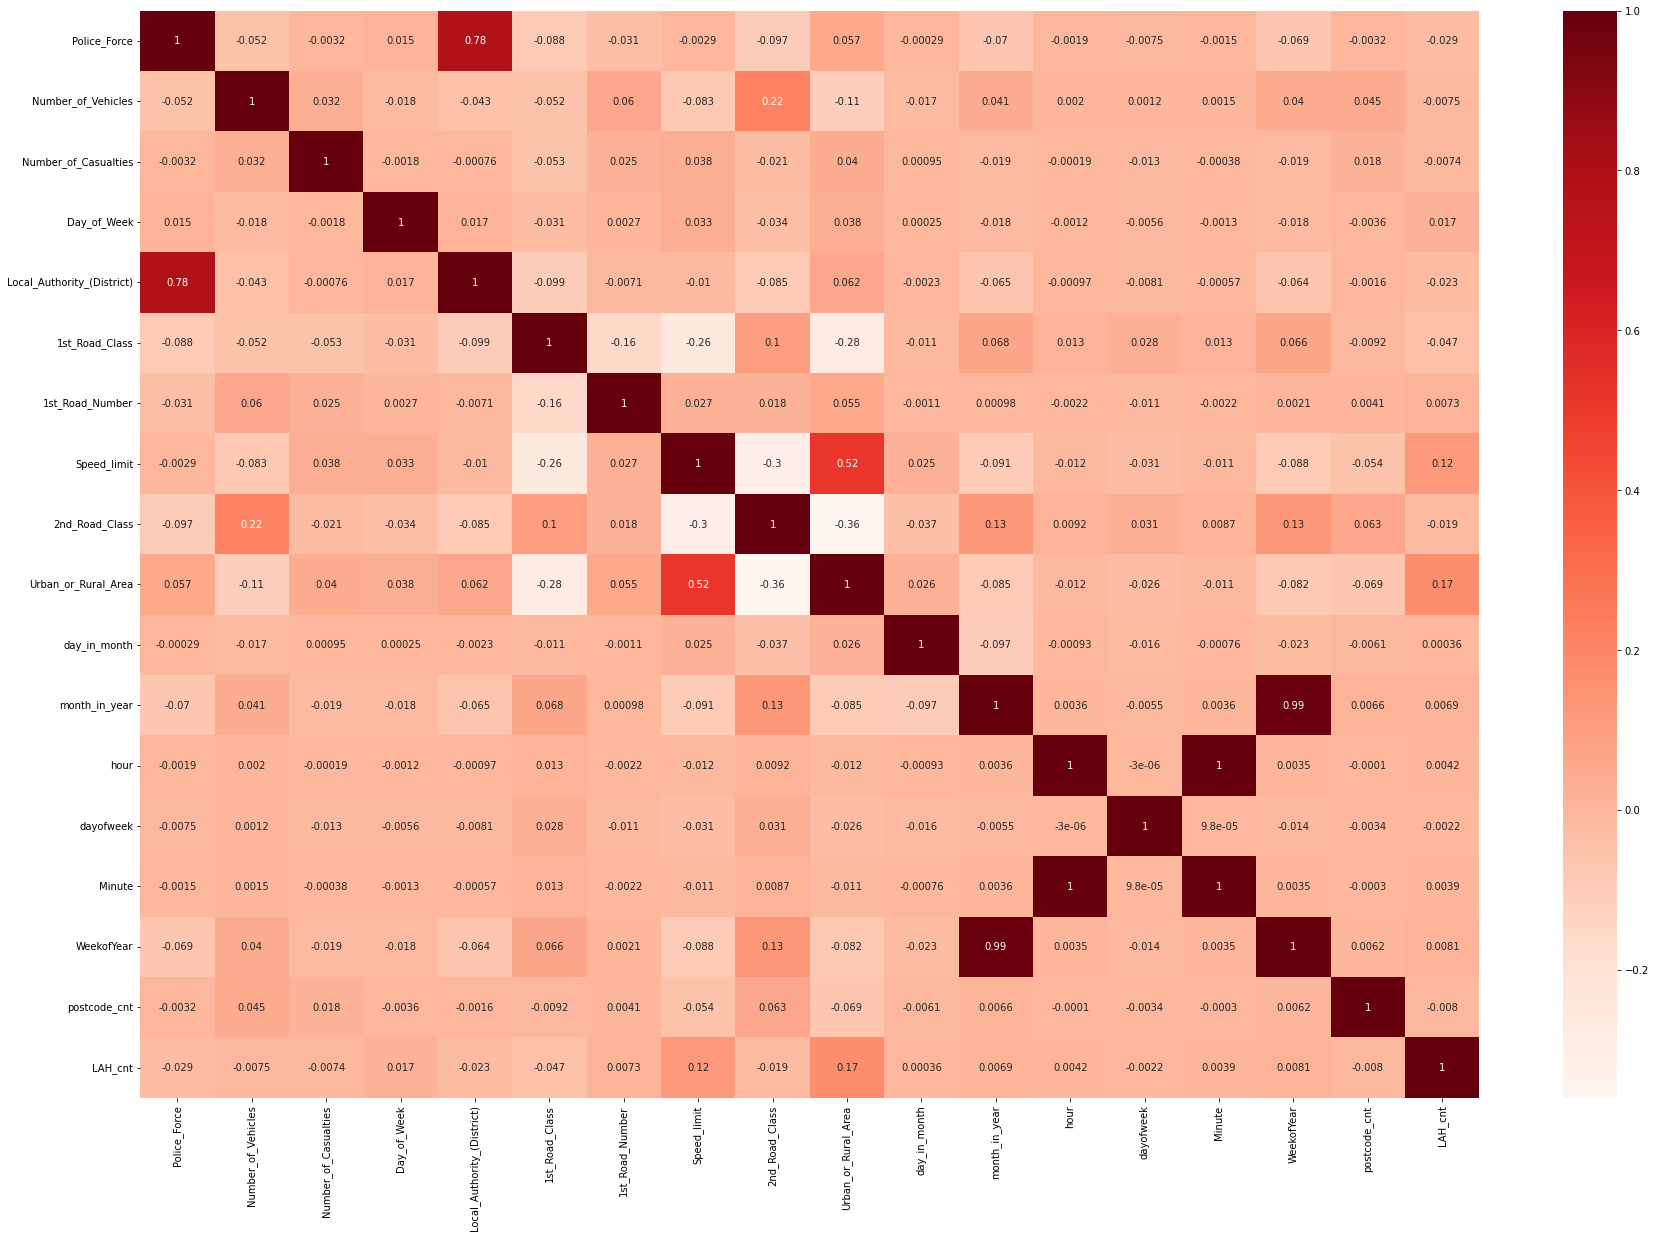

In [109]:
#Correlation of numerical columns
train = df[df['train_or_test']=='train']
train.head(3)
plt.figure(figsize=(30,20))
sns.heatmap(train.corr(),annot=True,cmap='Reds')
plt.show()

> A higher/lower number means high multicollinearity which we want to avoid. So we remove 1 of the columns from them. We don't need any strong correlated columns as they both contribute almost similar way. <br>
> Removing Local_Authority_(District), WeekofYear

In [110]:
train.drop(columns=['Local_Authority_(District)','WeekofYear'],inplace=True)
test = df[df['train_or_test']=='test']
test.drop(columns=['Local_Authority_(District)','WeekofYear'],inplace=True)
train.shape

(478741, 30)

In [111]:
#Let's find some insights and some analysis
#Categorical columns
cat_col = train.select_dtypes(include='object').columns
cat_col

Index(['Road_Type', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'state', 'postcode',
       'train_or_test', 'Type_of_Day', 'Season'],
      dtype='object')

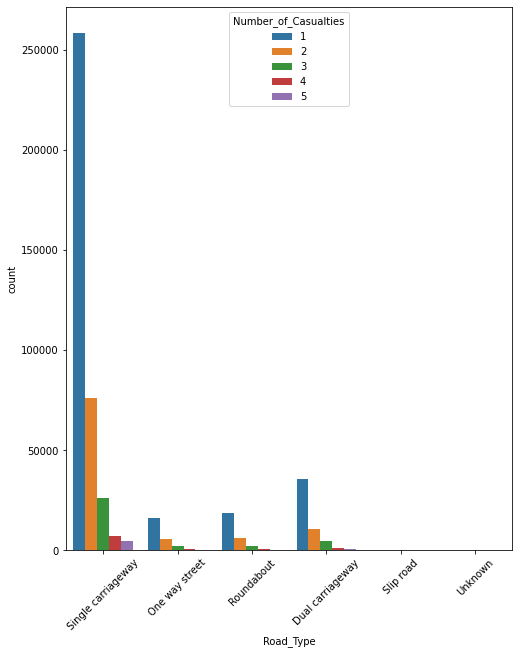

In [112]:
plt.figure(figsize=(8,10))
sns.countplot(data=train,x='Road_Type',hue='Number_of_Casualties')
plt.xticks(rotation=45)
plt.show()

In [113]:
def calculate_accident_rate(df,col):
    temp_df=pd.DataFrame(columns=['Category','Casualties per Accident'])
    for cat in df[col].unique():
        casualties_count= df[df[col]==cat]['Number_of_Casualties'].sum()
        accident_count = df[df[col]==cat].shape[0]
        temp_df = temp_df.append({'Category':cat,'Casualties per Accident':casualties_count/accident_count},ignore_index=True)
    return temp_df.sort_values(by='Casualties per Accident',ascending=False)
calculate_accident_rate(train,'Road_Type')

,Category,Casualties per Accident
5,Unknown,1.620690
3,Dual carriageway,1.506754
2,Roundabout,1.502190
1,One way street,1.486981
0,Single carriageway,1.452992
4,Slip road,1.397706


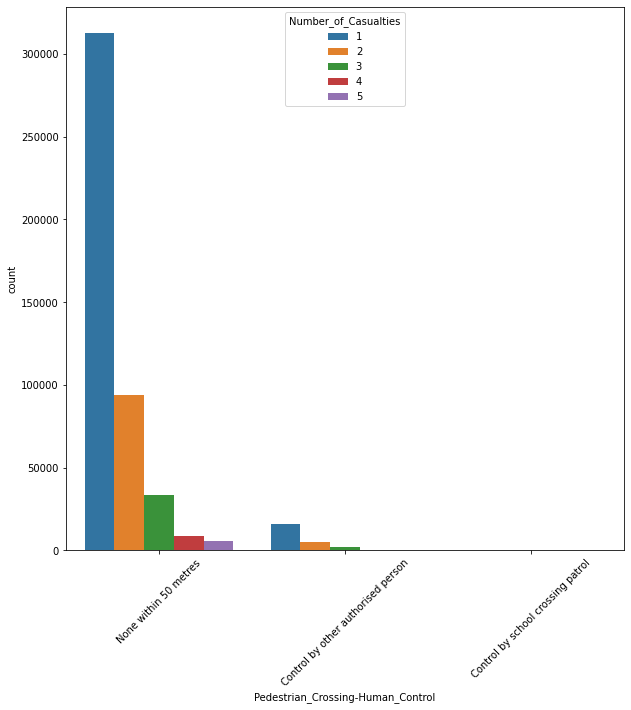

In [114]:
plt.figure(figsize=(10,10))
sns.countplot(data=train,x='Pedestrian_Crossing-Human_Control',hue='Number_of_Casualties')
plt.xticks(rotation=45)
plt.show()

In [115]:
calculate_accident_rate(train,'Pedestrian_Crossing-Human_Control')

,Category,Casualties per Accident
1,Control by other authorised person,1.478685
2,Control by school crossing patrol,1.468750
0,None within 50 metres,1.462740


In [116]:
# cat_col
# for col in cat_col:
#     sns.countplot(data=train,x=col,hue='Number_of_Casualties')
#     plt.xticks(rotation=45)
#     plt.show()
#     print(calculate_accident_rate(train,col))

In [117]:
print(cat_col)
train_ohe = train
ohe_cat_cols = ['Road_Type','Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'state',
       'Season']
for col in ohe_cat_cols:
    col_ohe = pd.get_dummies(train[col],prefix=col,drop_first=True)
    train_ohe = pd.concat((train_ohe,col_ohe),axis=1).drop(col,axis=1)

Index(['Road_Type', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'state', 'postcode',
       'train_or_test', 'Type_of_Day', 'Season'],
      dtype='object')


In [118]:
test_ohe=test
for col in ohe_cat_cols:
    col_ohe = pd.get_dummies(test[col],prefix=col,drop_first=True)
    test_ohe = pd.concat((test_ohe,col_ohe),axis=1).drop(col,axis=1)

In [119]:
print(train.columns)

Index(['Police_Force', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Day_of_Week', '1st_Road_Class', '1st_Road_Number', 'Road_Type',
       'Speed_limit', '2nd_Road_Class', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'state', 'postcode', 'day_in_month', 'month_in_year', 'hour',
       'dayofweek', 'Minute', 'train_or_test', 'postcode_cnt', 'LAH_cnt',
       'Type_of_Day', 'Season'],
      dtype='object')


In [120]:
print(train_ohe.columns)

Index(['Police_Force', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Day_of_Week', '1st_Road_Class', '1st_Road_Number', 'Speed_limit',
       '2nd_Road_Class', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'postcode',
       'day_in_month', 'month_in_year', 'hour', 'dayofweek', 'Minute',
       'train_or_test', 'postcode_cnt', 'LAH_cnt', 'Type_of_Day',
       'Road_Type_One way street', 'Road_Type_Roundabout',
       'Road_Type_Single carriageway', 'Road_Type_Slip road',
       'Road_Type_Unknown',
       'Pedestrian_Crossing-Human_Control_Control by school crossing patrol',
       'Pedestrian_Crossing-Human_Control_None within 50 metres',
       'Pedestrian_Crossing-Physical_Facilities_Footbridge or subway',
       'Pedestrian_Crossing-Physical_Facilities_No physical crossing within 50 meters',
       'Pedestrian_Crossing-Physical_Facilities_Pedestrian phase at traffic signal junction',
       'Pedestrian_Crossing-Physical_Facilities_Zebra crossi

In [121]:
train_ohe.shape

(478741, 65)

In [122]:
train_ohe.drop('train_or_test',axis=1,inplace=True)
test_ohe.drop('train_or_test',axis=1,inplace=True)

In [123]:
from sklearn.preprocessing import OrdinalEncoder
cols=['Speed_limit','2nd_Road_Class','1st_Road_Class','Urban_or_Rural_Area','Did_Police_Officer_Attend_Scene_of_Accident','Type_of_Day']
ord_en = OrdinalEncoder()
train_ohe[cols]=ord_en.fit_transform(train_ohe[cols])
test_ohe[cols]=ord_en.transform(test_ohe[cols])

train_ohe.shape, test_ohe.shape

((478741, 64), (121259, 64))

In [124]:
#Scale features
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# train_scale = pd.DataFrame(scaler.fit_transform(train),columns=train.columns)
# test_scale = pd.DataFrame(scaler.transform(test),columns=test.columns)

In [125]:
train_ohe.head(5)

,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,postcode,day_in_month,month_in_year,hour,dayofweek,Minute,postcode_cnt,LAH_cnt,Type_of_Day,Road_Type_One way street,Road_Type_Roundabout,Road_Type_Single carriageway,Road_Type_Slip road,Road_Type_Unknown,Pedestrian_Crossing-Human_Control_Control by school crossing patrol,Pedestrian_Crossing-Human_Control_None within 50 metres,Pedestrian_Crossing-Physical_Facilities_Footbridge or subway,Pedestrian_Crossing-Physical_Facilities_No physical crossing within 50 meters,Pedestrian_Crossing-Physical_Facilities_Pedestrian phase at traffic signal junction,Pedestrian_Crossing-Physical_Facilities_Zebra crossing,Pedestrian_Crossing-Physical_Facilities_non-junction pedestrian crossing,Light_Conditions_Darkness: Street lighting unknown,Light_Conditions_Darkness: Street lights present and lit,Light_Conditions_Darkness: Street lights present but unlit,Light_Conditions_Daylight: Street light present,Weather_Conditions_Fine without high winds,Weather_Conditions_Fog or mist,Weather_Conditions_Other,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing with high winds,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown,Road_Surface_Conditions_Flood (Over 3cm of water),Road_Surface_Conditions_Frost/Ice,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet/Damp,Special_Conditions_at_Site_Auto traffic singal out,Special_Conditions_at_Site_Mud,Special_Conditions_at_Site_None,Special_Conditions_at_Site_Ol or diesel,Special_Conditions_at_Site_Permanent sign or marking defective or obscured,Special_Conditions_at_Site_Road surface defective,Special_Conditions_at_Site_Roadworks,Carriageway_Hazards_Dislodged vehicle load in carriageway,Carriageway_Hazards_Involvement with previous accident,Carriageway_Hazards_None,Carriageway_Hazards_Other object in carriageway,Carriageway_Hazards_Pedestrian in carriageway (not injured),state_Cymru / Wales,state_England,Season_Spring,Season_Summer,Season_Winter
0,34,2,1,7,2.0,395,1.0,0.0,0.0,1.0,OX3 9UP,19,12,13,2,800.0,7,18011,0.0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0
1,5,2,1,4,1.0,13,1.0,0.0,0.0,0.0,S35 4EZ,2,11,7,4,473.0,12,2681,1.0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0
2,1,2,1,4,4.0,8,2.0,4.0,0.0,0.0,BN21 2XR,2,11,16,4,960.0,14,33979,0.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0
3,1,1,1,1,4.0,13,1.0,4.0,0.0,1.0,TA20 3PT,6,5,16,6,1010.0,12,13639,0.0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
4,46,1,1,3,1.0,24,1.0,4.0,0.0,0.0,DN20 0QF,30,6,13,5,805.0,12,8749,0.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1


In [126]:
#Merging
population = pd.read_csv('../input/predict-accident-risk-score-for-unique-postcode/population.csv')
population.head(3)

,postcode,Rural Urban,Variable: All usual residents; measures: Value,Variable: Males; measures: Value,Variable: Females; measures: Value,Variable: Lives in a household; measures: Value,Variable: Lives in a communal establishment; measures: Value,Variable: Schoolchild or full-time student aged 4 and over at their non term-time address; measures: Value,Variable: Area (Hectares); measures: Value,Variable: Density (number of persons per hectare); measures: Value
0,AL1 1,Total,5453,2715,2738,5408,45,75,225.63,24.2
1,AL1 2,Total,6523,3183,3340,6418,105,77,286.59,22.8
2,AL1 3,Total,4179,2121,2058,4100,79,46,97.12,43.0


In [127]:
roads_network = pd.read_csv('../input/predict-accident-risk-score-for-unique-postcode/roads_network.csv')
roads_network.head(3)

,WKT,roadClassi,roadFuncti,formOfWay,length,primaryRou,distance to the nearest point on rd,postcode
0,POINT (-2.3501 56.603923),A Road,A Road,Single Carriageway,2643.0,1.0,1.256769,AB1
1,POINT (-2.021334 57.130142),A Road,A Road,Single Carriageway,2643.0,1.0,1.834101,AB1 9NN
2,POINT (-2.108598 57.146338),A Road,A Road,Single Carriageway,2643.0,1.0,1.830243,AB10 1UH


In [128]:
roads_network["WKT"] = roads_network["WKT"].str.replace('[a-zA-Z]', '')
roads_network["WKT"]= roads_network["WKT"].replace(r'[(]+', ' ', regex=True)
roads_network["WKT"]= roads_network["WKT"].replace(r'[)]+', ' ', regex=True)
roads_network.head()

,WKT,roadClassi,roadFuncti,formOfWay,length,primaryRou,distance to the nearest point on rd,postcode
0,-2.3501 56.603923,A Road,A Road,Single Carriageway,2643.0,1.0,1.256769,AB1
1,-2.021334 57.130142,A Road,A Road,Single Carriageway,2643.0,1.0,1.834101,AB1 9NN
2,-2.108598 57.146338,A Road,A Road,Single Carriageway,2643.0,1.0,1.830243,AB10 1UH
3,-2.093928 57.148218,A Road,A Road,Single Carriageway,2643.0,1.0,1.835092,AB10 1YL
4,-2.116089 57.131671,A Road,A Road,Single Carriageway,2643.0,1.0,1.814373,AB10 6AT


In [129]:
roads_network = roads_network.applymap(lambda x: x.strip() if isinstance(x, str) else x)
roads_network.head()
roads_network['Longitude'], roads_network['Latitude'] = roads_network['WKT'].str.split(' ', 1).str
roads_network.sample(3)

,WKT,roadClassi,roadFuncti,formOfWay,length,primaryRou,distance to the nearest point on rd,postcode,Longitude,Latitude
9602,-11.766284 50.026273,NaN,NaN,NaN,NaN,NaN,NaN,BT10 0JJ,-11.766284,50.026273
51350,-1.130894 52.9348,A Road,A Road,Single Carriageway,118.0,0.0,0.004803,NG2 6AB,-1.130894,52.9348
10978,0.140065 52.185355,A Road,A Road,Roundabout,71.0,1.0,0.043276,CB1 7TY,0.140065,52.185355


In [130]:
roads_network.shape

(91566, 10)

In [131]:
roads_network.drop_duplicates(subset=['postcode'], keep='first', inplace=True)
roads_network.shape

(75895, 10)

In [132]:
train_ohe = pd.merge(train_ohe, population, on = ['postcode'],how='left')
test_ohe  = pd.merge(test_ohe, population, on = ['postcode'],how='left')

train_ohe = pd.merge(train_ohe, roads_network, on = ['postcode'],how='left')
test_ohe  = pd.merge(test_ohe, roads_network, on = ['postcode'],how='left')

In [133]:
print('There are {} rows and {} columns in train'.format(train_ohe.shape[0],train_ohe.shape[1]))
print('There are {} rows and {} columns in test'.format(test_ohe.shape[0],test_ohe.shape[1]))

There are 478741 rows and 82 columns in train
There are 121259 rows and 82 columns in test


In [134]:
#all columns
train_ohe.columns

Index(['Police_Force', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Day_of_Week', '1st_Road_Class', '1st_Road_Number', 'Speed_limit',
       '2nd_Road_Class', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'postcode',
       'day_in_month', 'month_in_year', 'hour', 'dayofweek', 'Minute',
       'postcode_cnt', 'LAH_cnt', 'Type_of_Day', 'Road_Type_One way street',
       'Road_Type_Roundabout', 'Road_Type_Single carriageway',
       'Road_Type_Slip road', 'Road_Type_Unknown',
       'Pedestrian_Crossing-Human_Control_Control by school crossing patrol',
       'Pedestrian_Crossing-Human_Control_None within 50 metres',
       'Pedestrian_Crossing-Physical_Facilities_Footbridge or subway',
       'Pedestrian_Crossing-Physical_Facilities_No physical crossing within 50 meters',
       'Pedestrian_Crossing-Physical_Facilities_Pedestrian phase at traffic signal junction',
       'Pedestrian_Crossing-Physical_Facilities_Zebra crossing',
       'Pedestrian_

In [135]:
#drop columns
drop_columns_1 = ["Rural Urban","WKT","roadFuncti","formOfWay"]
train_ohe.drop(drop_columns_1, axis=1, inplace=True)
test_ohe.drop(drop_columns_1, axis=1, inplace=True)

In [136]:
#Replace NAN with "999"
train_ohe.replace(to_replace=np.nan, value='999', inplace = True)
test_ohe.replace(to_replace=np.nan, value='999', inplace = True)

In [137]:
int_columns = ['Variable: All usual residents; measures: Value',
               'Variable: Males; measures: Value',
               'Variable: Females; measures: Value',
               'Variable: Lives in a household; measures: Value',
               'Variable: Lives in a communal establishment; measures: Value',
               'Variable: Schoolchild or full-time student aged 4 and over at their non term-time address; measures: Value',
               ]

float_columns = ['Variable: Area (Hectares); measures: Value', 
                 'Variable: Density (number of persons per hectare); measures: Value',
                 'distance to the nearest point on rd',
                 'length',
                 'Latitude',
                 'Longitude']

train_ohe[int_columns] = train_ohe[int_columns].astype(int)
test_ohe[int_columns]  = test_ohe[int_columns].astype(int)

train_ohe[float_columns] = train_ohe[float_columns].astype(float)
test_ohe[float_columns]  = test_ohe[float_columns].astype(float)

In [138]:
#Latitude & Longitude
train_ohe['var_max_lat'] = train_ohe['Latitude'].max() - train_ohe['Latitude']
train_ohe['var_max_long'] = train_ohe['Longitude'].max() - train_ohe['Longitude']
test_ohe['var_max_lat'] = test_ohe['Latitude'].max() - test_ohe['Latitude']
test_ohe['var_max_long'] = test_ohe['Longitude'].max() - test_ohe['Longitude']

train_ohe['lon_plus_lat'] = train_ohe['Longitude'] + train_ohe['Latitude'] 
test_ohe['lon_plus_lat'] = test_ohe['Longitude'] + test_ohe['Latitude']

In [139]:
x_train=train_ohe.drop("Number_of_Casualties",axis=1)
y_train=train_ohe["Number_of_Casualties"]

In [140]:
x_train.head(3)

,Police_Force,Number_of_Vehicles,Day_of_Week,1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,postcode,day_in_month,month_in_year,hour,dayofweek,Minute,postcode_cnt,LAH_cnt,Type_of_Day,Road_Type_One way street,Road_Type_Roundabout,Road_Type_Single carriageway,Road_Type_Slip road,Road_Type_Unknown,Pedestrian_Crossing-Human_Control_Control by school crossing patrol,Pedestrian_Crossing-Human_Control_None within 50 metres,Pedestrian_Crossing-Physical_Facilities_Footbridge or subway,Pedestrian_Crossing-Physical_Facilities_No physical crossing within 50 meters,Pedestrian_Crossing-Physical_Facilities_Pedestrian phase at traffic signal junction,Pedestrian_Crossing-Physical_Facilities_Zebra crossing,Pedestrian_Crossing-Physical_Facilities_non-junction pedestrian crossing,Light_Conditions_Darkness: Street lighting unknown,Light_Conditions_Darkness: Street lights present and lit,Light_Conditions_Darkness: Street lights present but unlit,Light_Conditions_Daylight: Street light present,Weather_Conditions_Fine without high winds,Weather_Conditions_Fog or mist,Weather_Conditions_Other,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing with high winds,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown,Road_Surface_Conditions_Flood (Over 3cm of water),Road_Surface_Conditions_Frost/Ice,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet/Damp,Special_Conditions_at_Site_Auto traffic singal out,Special_Conditions_at_Site_Mud,Special_Conditions_at_Site_None,Special_Conditions_at_Site_Ol or diesel,Special_Conditions_at_Site_Permanent sign or marking defective or obscured,Special_Conditions_at_Site_Road surface defective,Special_Conditions_at_Site_Roadworks,Carriageway_Hazards_Dislodged vehicle load in carriageway,Carriageway_Hazards_Involvement with previous accident,Carriageway_Hazards_None,Carriageway_Hazards_Other object in carriageway,Carriageway_Hazards_Pedestrian in carriageway (not injured),state_Cymru / Wales,state_England,Season_Spring,Season_Summer,Season_Winter,Variable: All usual residents; measures: Value,Variable: Males; measures: Value,Variable: Females; measures: Value,Variable: Lives in a household; measures: Value,Variable: Lives in a communal establishment; measures: Value,Variable: Schoolchild or full-time student aged 4 and over at their non term-time address; measures: Value,Variable: Area (Hectares); measures: Value,Variable: Density (number of persons per hectare); measures: Value,roadClassi,length,primaryRou,distance to the nearest point on rd,Longitude,Latitude,var_max_lat,var_max_long,lon_plus_lat
0,34,2,7,2.0,395,1.0,0.0,0.0,1.0,OX3 9UP,19,12,13,2,800.0,7,18011,0.0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,999,999,999,999,999,999,999.0,999.0,999,999.0,999,999.0,999.0,999.0,0.0,0.0,1998.0
1,5,2,4,1.0,13,1.0,0.0,0.0,0.0,S35 4EZ,2,11,7,4,473.0,12,2681,1.0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,999,999,999,999,999,999,999.0,999.0,999,999.0,999,999.0,999.0,999.0,0.0,0.0,1998.0
2,1,2,4,4.0,8,2.0,4.0,0.0,0.0,BN21 2XR,2,11,16,4,960.0,14,33979,0.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,999,999,999,999,999,999,999.0,999.0,999,999.0,999,999.0,999.0,999.0,0.0,0.0,1998.0


In [141]:
corr_matrix=train_ohe.corr()
corr_matrix.sort_values('Number_of_Casualties')['Number_of_Casualties']

1st_Road_Class                                                                                               -0.054189
2nd_Road_Class                                                                                               -0.026368
Road_Type_Single carriageway                                                                                 -0.024185
month_in_year                                                                                                -0.019378
Light_Conditions_Darkness: Street lights present and lit                                                     -0.017420
Road_Surface_Conditions_Wet/Damp                                                                             -0.014667
Season_Spring                                                                                                -0.013798
dayofweek                                                                                                    -0.012657
Weather_Conditions_Raining without high winds   

In [142]:
train_ohe.drop('postcode',inplace=True,axis=1)
test_ohe.drop('postcode',inplace=True,axis=1)

In [143]:
train_ohe.drop(['roadClassi','primaryRou'],inplace=True,axis=1)
test_ohe.drop(['roadClassi','primaryRou'],inplace=True,axis=1)

In [144]:
#Modelling
y      = train_ohe["Number_of_Casualties"]
X      = x_train.copy()
X.drop('postcode',inplace=True,axis=1)
X.drop(['roadClassi','primaryRou'],inplace=True,axis=1)
x_test = test_ohe.drop('Number_of_Casualties',axis=1)
y_test = test_ohe['Number_of_Casualties']
x_train=train_ohe.drop("Number_of_Casualties",axis=1)
y_train=train_ohe["Number_of_Casualties"]
X_test = x_test.copy()
X.shape, X_test.shape, y.shape

((478741, 77), (121259, 77), (478741,))

In [145]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478741 entries, 0 to 478740
Data columns (total 77 columns):
 #   Column                                                                                                      Non-Null Count   Dtype  
---  ------                                                                                                      --------------   -----  
 0   Police_Force                                                                                                478741 non-null  int64  
 1   Number_of_Vehicles                                                                                          478741 non-null  int64  
 2   Day_of_Week                                                                                                 478741 non-null  int64  
 3   1st_Road_Class                                                                                              478741 non-null  float64
 4   1st_Road_Number                                         

In [146]:
#Basic modeling
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import xgboost as xgb
import lightgbm as lgb
n_folds = 10

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(y.values)
    r2= cross_val_score(model, X.values, y.values, scoring  = 'neg_root_mean_squared_error', cv = kf)
    return(r2)

model_xgb = xgb.XGBRegressor(random_state =7)
model_lgb = lgb.LGBMRegressor(random_state =7)
model_cb  = CatBoostRegressor(random_state =7, verbose=False)
model_rf  = RandomForestRegressor(random_state =7)

In [147]:
debug=2000
rounds=90000
early_stop=200

X_1 = X.values
X_test_1 = X_test.values
target = y.values.reshape(-1,1)
verbose=debug

In [148]:
%%time
#lgbm

train_oof = np.zeros((X.shape[0],))
test_preds = np.zeros((X_test.shape[0],))
train_oof.shape,test_preds.shape

#params = {'learning_rate': 0.017, 'max_depth': -1,'n_estimators': rounds,'metric': 'rmse',}
params = {'bootstrap_type': 'Bernoulli','n_estimators': rounds,'eval_metric': 'RMSE','learning_rate': 0.017}
#params = {'eval_metric': 'rmse',}
n_splits = 10
kf = KFold(n_splits=n_splits, random_state=137, shuffle=True)

for jj, (train_index, val_index) in enumerate(kf.split(X_1, target)):
    print("Fitting fold", jj+1)
    train_features = X_1[train_index]
    train_target = target[train_index]
    
    val_features = X_1[val_index]
    val_target = target[val_index]
    
    #model = LGBMRegressor(**params)
    #model = XGBRegressor(**params)
    model = CatBoostRegressor(**params)
    model.fit(train_features, train_target,
             eval_set=(val_features, val_target),
             early_stopping_rounds=early_stop,
             verbose=debug,
            )
    val_pred = model.predict(val_features)
    train_oof[val_index] = val_pred.flatten()
    test_preds += model.predict(X_test_1).flatten()/n_splits

print("\n")
print("mean_squared_error:",mean_squared_error(target,train_oof, squared=False))
print("r2_score:",r2_score(target,train_oof))

Fitting fold 1
0:	learn: 0.8154250	test: 0.8196945	best: 0.8196945 (0)	total: 136ms	remaining: 3h 23m 30s
2000:	learn: 0.8050482	test: 0.8131241	best: 0.8131222 (1992)	total: 1m 54s	remaining: 1h 24m 14s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.8131208858
bestIteration = 2057

Shrink model to first 2058 iterations.
Fitting fold 2
0:	learn: 0.8165138	test: 0.8099663	best: 0.8099663 (0)	total: 109ms	remaining: 2h 43m 3s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.8040388341
bestIteration = 1618

Shrink model to first 1619 iterations.
Fitting fold 3
0:	learn: 0.8159158	test: 0.8154073	best: 0.8154073 (0)	total: 73.6ms	remaining: 1h 50m 22s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.8094841733
bestIteration = 1566

Shrink model to first 1567 iterations.
Fitting fold 4
0:	learn: 0.8151332	test: 0.8224255	best: 0.8224255 (0)	total: 74.9ms	remaining: 1h 52m 24s
Stopped by overfitting detector  (200 iterations wait)

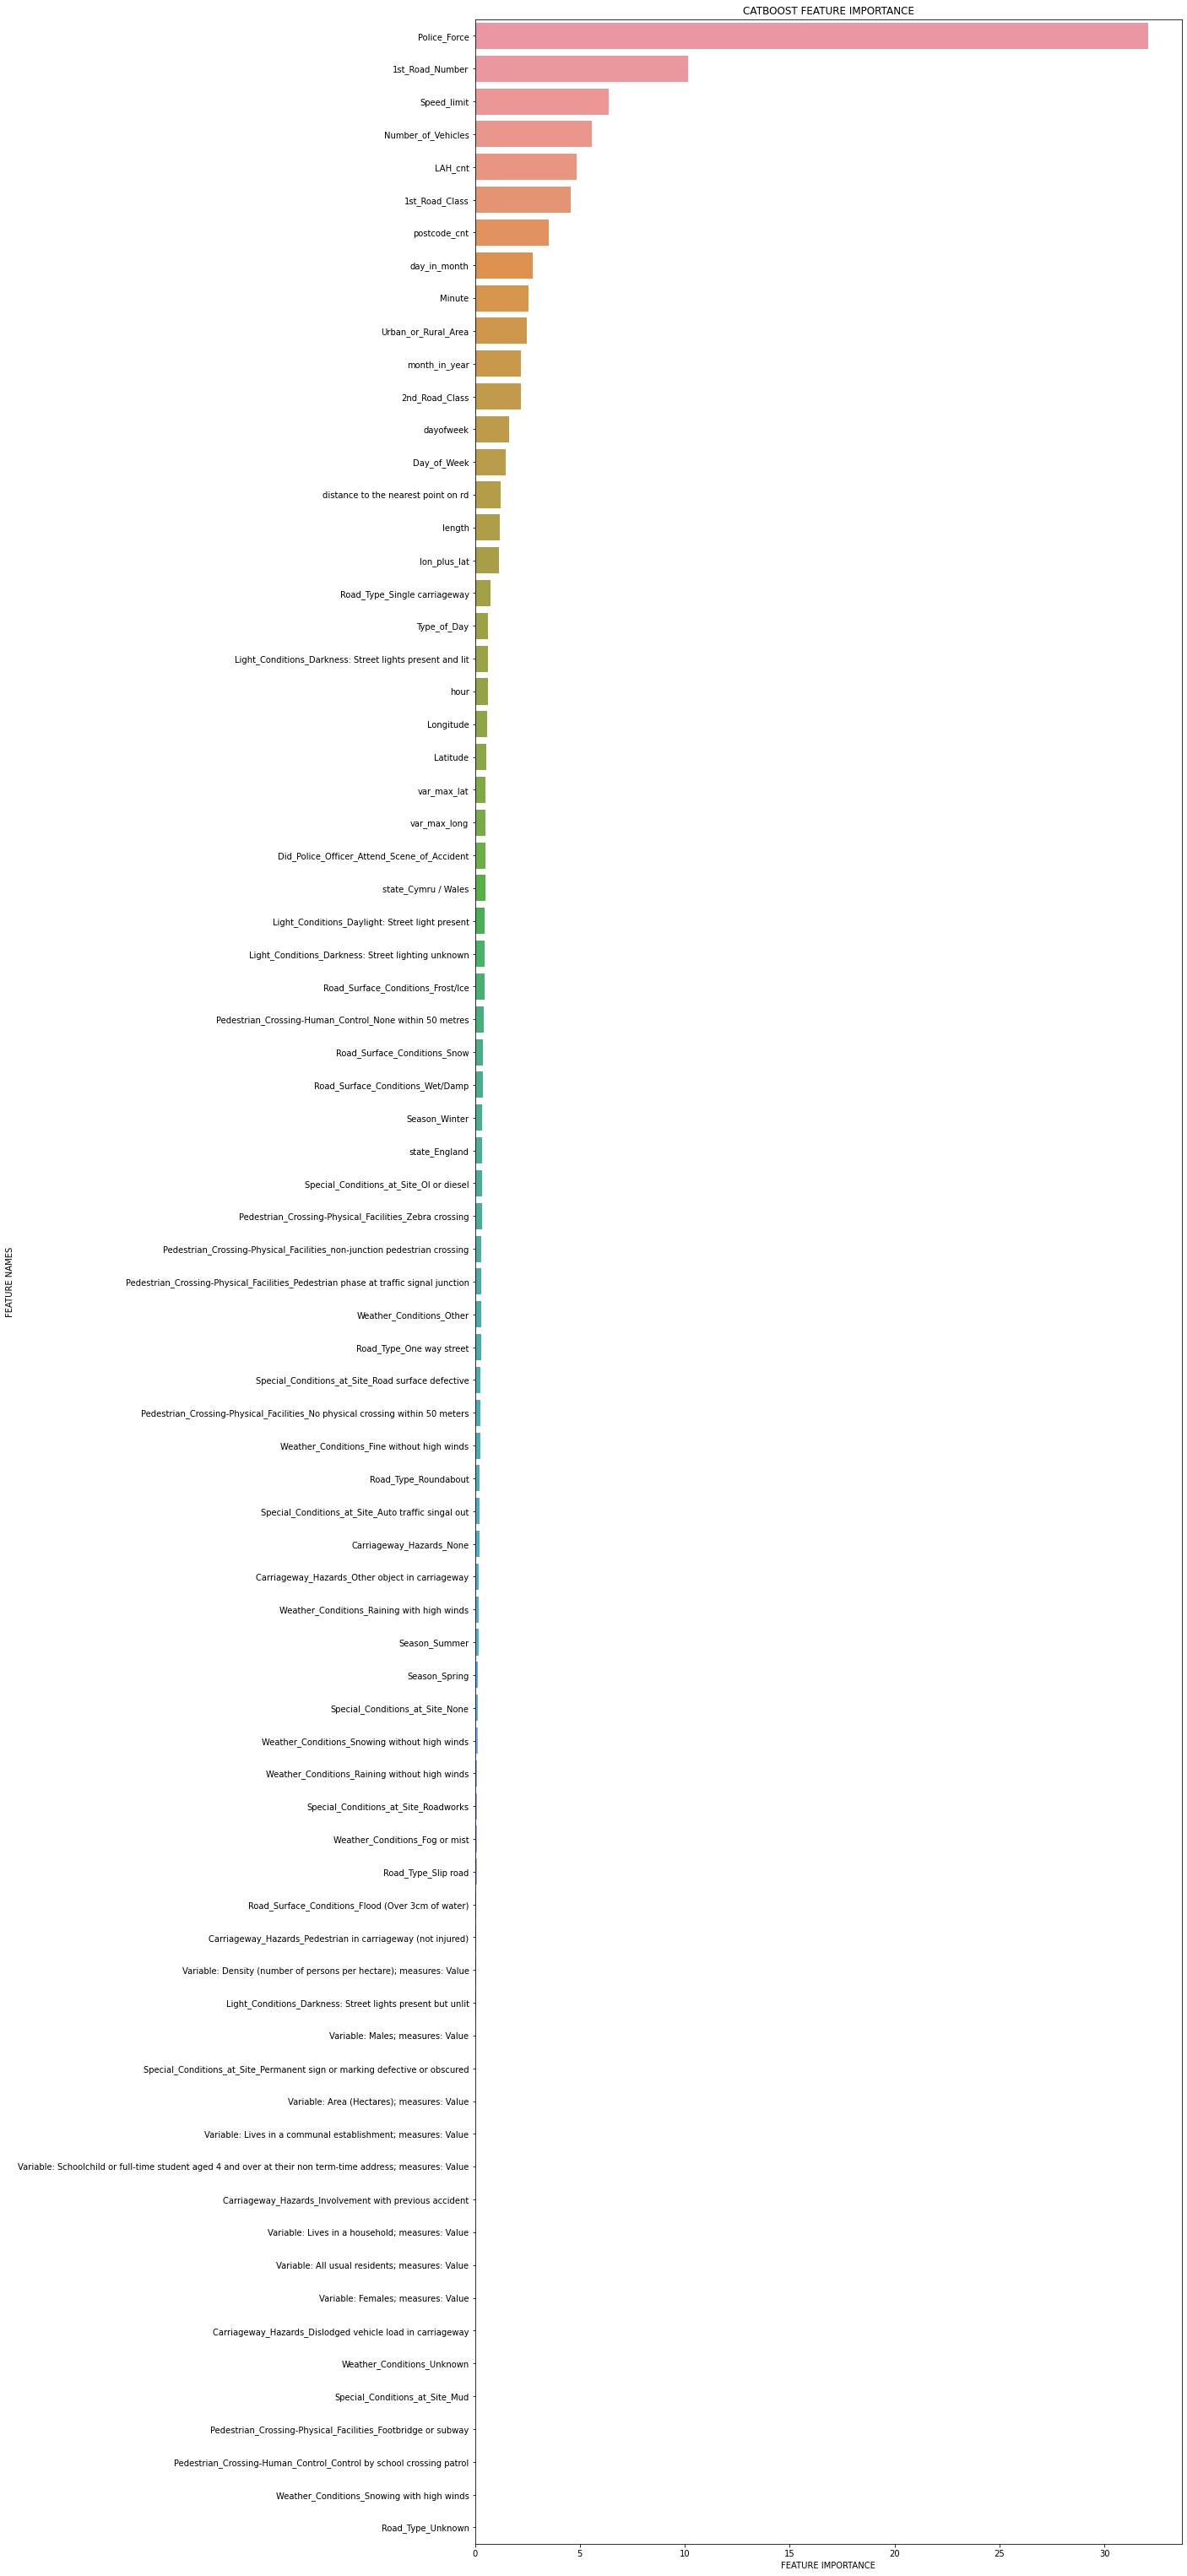

In [149]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(15,55))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    
plot_feature_importance(model.get_feature_importance(),x_train.columns,'CATBOOST')

In [150]:
#Submit prediction
df1=pd.read_csv('../input/predict-accident-risk-score-for-unique-postcode/test.csv')

df1["casualities"]=test_preds

Accident_risk_index=df1.groupby("postcode").casualities.sum()/df1.groupby("postcode").Accident_ID.count()

postcode=list(df1.groupby("postcode").postcode.count().index)

sub_final_df=pd.DataFrame({"postcode":postcode,"Accident_risk_index":Accident_risk_index})
sub_final_df.to_csv("cb_new_divide_by_ft_pluslat_lon_reduced.csv",index=False)
sub_final_df.shape,sub_final_df.head(10)

((49772, 2),
           postcode  Accident_risk_index
 postcode                               
 AB10 1AU  AB10 1AU             1.379854
 AB10 1PG  AB10 1PG             1.371820
 AB10 1TT  AB10 1TT             1.520330
 AB10 1YP  AB10 1YP             1.440669
 AB10 6LQ  AB10 6LQ             1.372302
 AB10 6NN  AB10 6NN             1.521384
 AB10 7FT  AB10 7FT             1.505530
 AB10 7JP  AB10 7JP             1.256411
 AB10 7LY  AB10 7LY             1.247259
 AB11 5BD  AB11 5BD             1.331288)